# Homework 5
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

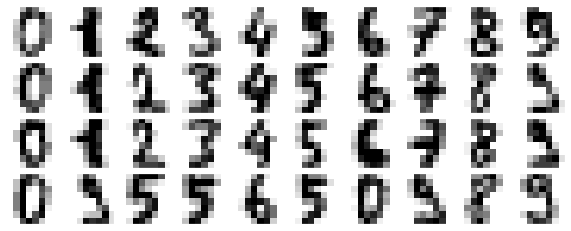

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

## Using PCA to reduce data dimensionality

In [21]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

pca = PCA(0.8)
pca.fit(digits.data)

print('explained variance ratio with',pca.n_components_,'components:',sum(pca.explained_variance_ratio_))

new_digits = pca.transform(digits.data)

explained variance ratio with 13 components: 0.8028957761040317


## Classifying digits with linear kernel

In [38]:
linearModel = SVC(kernel='linear')
rsearchLinear = RandomizedSearchCV(estimator=linearModel,param_distributions={'C': uniform(0,10)},
                                   cv=5,n_iter=100,iid=True)
rsearchLinear.fit(new_digits,digits.target)

print('accuracy:',rsearchLinear.best_score_)
print('C:',rsearchLinear.best_estimator_.C)

accuracy: 0.9360044518642181
C: 0.008138856569673836


## Classifying digits with radial kernel

In [36]:
radialModel = SVC(kernel='rbf')
rsearchRadial = RandomizedSearchCV(estimator=radialModel,
                                   param_distributions={'C': uniform(0,10),'gamma': uniform(0,0.01)},
                                   cv=5,n_iter=100,iid=True)
rsearchRadial.fit(new_digits,digits.target)

print('accuracy:',rsearchRadial.best_score_)
print('C:',rsearchRadial.best_estimator_.C)
print('gamma:',rsearchRadial.best_estimator_.gamma)

accuracy: 0.9721758486366165
C: 2.252669990467555
gamma: 0.0009330000675629047


## Classifying digits with polynomial kernel

In [72]:
polynomialModel = SVC(kernel='poly')
poly_model_params = {'C': uniform(0,1),'gamma': uniform(0,0.01),'degree': np.linspace(1,10,10),'coef0': uniform(0,10)}
rsearchPolynomial = RandomizedSearchCV(estimator=polynomialModel,param_distributions=poly_model_params,
                                       cv=5,n_iter=100,iid=True)
rsearchPolynomial.fit(new_digits,digits.target)

print('accuracy:',rsearchPolynomial.best_score_)
print('C:',rsearchPolynomial.best_estimator_.C)
print('gamma:',rsearchPolynomial.best_estimator_.gamma)
print('degree:',rsearchPolynomial.best_estimator_.degree)
print('coef0:',rsearchPolynomial.best_estimator_.coef0)

accuracy: 0.9649415692821369
C: 0.7492153079302818
gamma: 0.0003286431652391375
degree: 6.0
coef0: 0.8562351535955126
